In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("J:/Data science/data/countries.csv")

In [4]:
df.head()

,country,latitude,longitude,language
0,USA,44.97,-103.77,english
1,Canada,62.40,-96.80,english
2,France,46.75,2.40,french
3,UK,54.01,-2.53,english
4,Germany,51.15,10.40,german


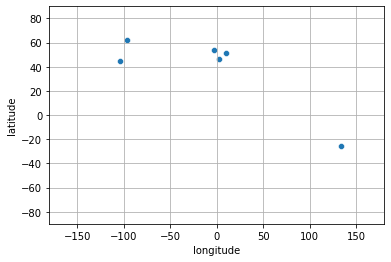

In [5]:
sns.scatterplot(data=df,x='longitude',y='latitude')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.grid()

In [6]:
x = df.iloc[: , [1,2]]
x

,latitude,longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [7]:
from sklearn.cluster import KMeans

In [8]:
kmean = KMeans(n_clusters=2 , n_init = 10)
kmean.fit(x)

KMeans(n_clusters=2)

In [9]:
y_pred = kmean.predict(x)
y_pred

array([1, 1, 1, 1, 1, 0])

In [10]:
data_with_cluster = df.copy()
data_with_cluster['cluster'] = y_pred

In [11]:
data_with_cluster

,country,latitude,longitude,language,cluster
0,USA,44.97,-103.77,english,1
1,Canada,62.40,-96.80,english,1
2,France,46.75,2.40,french,1
3,UK,54.01,-2.53,english,1
4,Germany,51.15,10.40,german,1
5,Australia,-25.45,133.11,english,0


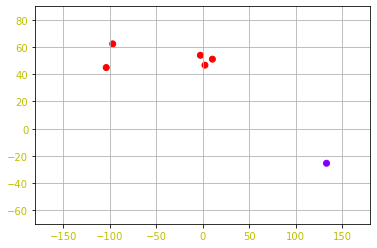

In [12]:
plt.scatter(data_with_cluster['longitude'],data_with_cluster['latitude'],c=data_with_cluster['cluster'],cmap='rainbow')
plt.xticks(c='y')
plt.yticks(c='y')
plt.xlim(-180,180)
plt.ylim(-70,90)
plt.grid()
plt.show()

In [13]:
kmeans_model2 = KMeans(n_clusters=3,n_init=10)
kmeans_model2.fit(x)

KMeans(n_clusters=3)

In [14]:
y_pred = kmeans_model2.predict(x)
y_pred

array([2, 2, 1, 1, 1, 0])

In [15]:
data_with_cluster = df.copy()
data_with_cluster['cluster'] = y_pred
data_with_cluster

,country,latitude,longitude,language,cluster
0,USA,44.97,-103.77,english,2
1,Canada,62.40,-96.80,english,2
2,France,46.75,2.40,french,1
3,UK,54.01,-2.53,english,1
4,Germany,51.15,10.40,german,1
5,Australia,-25.45,133.11,english,0


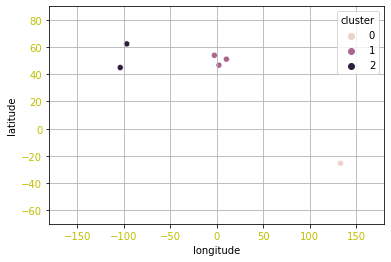

In [16]:
sns.scatterplot(data=data_with_cluster,x='longitude',y='latitude',hue='cluster')
plt.xticks(c='y')
plt.yticks(c='y')
plt.xlim(-180,180)
plt.ylim(-70,90)
plt.grid()
plt.show()

In [17]:
copy_data = df.copy()
dummy = pd.get_dummies(copy_data['language'])
dummy

,english,french,german
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1
5,1,0,0


In [18]:
copy_data = copy_data.drop('language',axis=1)
copy_data

,country,latitude,longitude
0,USA,44.97,-103.77
1,Canada,62.40,-96.80
2,France,46.75,2.40
3,UK,54.01,-2.53
4,Germany,51.15,10.40
5,Australia,-25.45,133.11


In [19]:
final = pd.concat([copy_data,dummy],axis=1)
final

,country,latitude,longitude,english,french,german
0,USA,44.97,-103.77,1,0,0
1,Canada,62.40,-96.80,1,0,0
2,France,46.75,2.40,0,1,0
3,UK,54.01,-2.53,1,0,0
4,Germany,51.15,10.40,0,0,1
5,Australia,-25.45,133.11,1,0,0


In [20]:
x = final.iloc[:, 1:4]
x

,latitude,longitude,english
0,44.97,-103.77,1
1,62.40,-96.80,1
2,46.75,2.40,0
3,54.01,-2.53,1
4,51.15,10.40,0
5,-25.45,133.11,1


In [21]:
kmeans_model3 = KMeans(n_clusters=3)
kmeans_model3.fit(x)

KMeans(n_clusters=3)

In [22]:
y_pred = kmeans_model3.predict(x)
y_pred

array([1, 1, 0, 0, 0, 2])

In [23]:
data_with_cluster = final.copy()
data_with_cluster['cluster'] = y_pred
data_with_cluster

,country,latitude,longitude,english,french,german,cluster
0,USA,44.97,-103.77,1,0,0,1
1,Canada,62.40,-96.80,1,0,0,1
2,France,46.75,2.40,0,1,0,0
3,UK,54.01,-2.53,1,0,0,0
4,Germany,51.15,10.40,0,0,1,0
5,Australia,-25.45,133.11,1,0,0,2


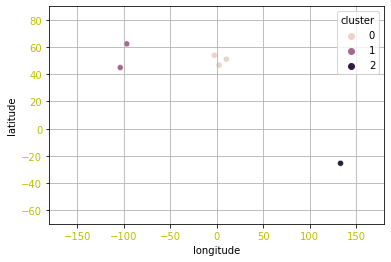

In [24]:
sns.scatterplot(data=data_with_cluster,x='longitude',y='latitude',hue='cluster')
plt.xticks(c='y')
plt.yticks(c='y')
plt.xlim(-180,180)
plt.ylim(-70,90)
plt.grid()
plt.show()

In [32]:
copy_data = df.copy()
dummy = pd.get_dummies(copy_data)
dummy

,latitude,longitude,country_Australia,country_Canada,country_France,country_Germany,country_UK,country_USA,language_english,language_french,language_german
0,44.97,-103.77,0,0,0,0,0,1,1,0,0
1,62.40,-96.80,0,1,0,0,0,0,1,0,0
2,46.75,2.40,0,0,1,0,0,0,0,1,0
3,54.01,-2.53,0,0,0,0,1,0,1,0,0
4,51.15,10.40,0,0,0,1,0,0,0,0,1
5,-25.45,133.11,1,0,0,0,0,0,1,0,0


In [33]:
x = dummy.iloc[:,8:11]
x

,language_english,language_french,language_german
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1
5,1,0,0


In [34]:
kme = KMeans(n_clusters=3)
kme.fit(x)

KMeans(n_clusters=3)

In [35]:
y_pred = kme.predict(x)

In [36]:
y_pred

array([0, 0, 2, 0, 1, 0])

In [37]:
data_with_cluster = dummy.copy()
data_with_cluster['cluster'] = y_pred
data_with_cluster

,latitude,longitude,country_Australia,country_Canada,country_France,country_Germany,country_UK,country_USA,language_english,language_french,language_german,cluster
0,44.97,-103.77,0,0,0,0,0,1,1,0,0,0
1,62.40,-96.80,0,1,0,0,0,0,1,0,0,0
2,46.75,2.40,0,0,1,0,0,0,0,1,0,2
3,54.01,-2.53,0,0,0,0,1,0,1,0,0,0
4,51.15,10.40,0,0,0,1,0,0,0,0,1,1
5,-25.45,133.11,1,0,0,0,0,0,1,0,0,0


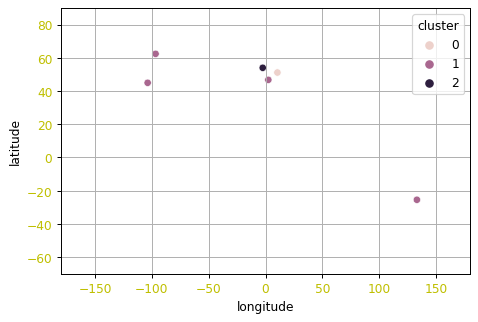

In [31]:
plt.figure(dpi=88)
sns.scatterplot(data=data_with_cluster,x='longitude',y='latitude',hue='cluster')
plt.xticks(c='y')
plt.yticks(c='y')
plt.xlim(-180,180)
plt.ylim(-70,90)
plt.grid()
plt.show()